In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [87]:
#log10 function for later use in case of extreme skewness.

def log_10(input):
    if input > 0:
        input = math.log10(input)
    if input == 0:
        input = 0
    return input

In [88]:
df = pd.read_csv("merge_with_security_time")

In [89]:
df

,Unnamed: 0,Code,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg,security_avg
0,0,ABE,allentown,KABE,40.652100,-75.440804,393,10988,42077,51.902490,4.161037,5.250000,0.166667,682899,517148.0,13397,150.000000,2.450000
1,1,ABI,abilene,KABI,32.411301,-99.681900,1791,5333,48441,64.488797,2.131411,0.750000,0.083333,114964,123699.5,18078,133.333333,1.416667
2,2,ABQ,albuquerque,KABQ,35.040199,-106.609001,5355,3742,35001,54.316598,0.928465,6.833333,0.250000,758523,3735962.5,39793,150.000000,2.974359
3,3,ABY,albany,KABY,31.535500,-84.194504,197,17309,13095,66.578008,4.069336,0.416667,0.083333,90515,57631.0,11801,150.000000,1.583333
4,4,ACK,nantucket,KACK,41.253101,-70.060204,47,19193,25019,50.793361,3.703195,0.583333,0.083333,201,176314.0,12999,100.000000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,TYS,knoxville,KTYS,35.811001,-83.994003,981,8569,47093,58.838589,4.469751,3.416667,0.166667,585249,1498534.5,18005,150.000000,2.588235
249,249,VLD,valdosta,KVLD,30.782499,-83.276703,203,17227,13185,66.983817,4.138382,0.250000,0.166667,79294,66042.5,17236,108.333333,1.000000
250,250,VPS,valparaiso,KVPS,30.483200,-86.525398,87,2510,12091,67.168050,5.020456,0.000000,0.000000,4946,909512.5,22017,300.000000,3.033333
251,251,WYS,yellowstone,KWYS,44.688400,-111.117996,6649,26356,30031,40.186307,2.004440,0.000000,0.000000,1365,12886.0,8399,150.000000,3.428571


Now we want to know whether the distribution of each variable is reasonable or not.
We want to use box plots to check the outliers and use histogram to check the distributions.

1. The column "temp_avg"

In [90]:
df['temp_avg'].describe()

count    253.000000
mean      55.955817
std        9.688768
min       35.578008
25%       48.169295
50%       55.254772
75%       64.004564
max       76.737344
Name: temp_avg, dtype: float64

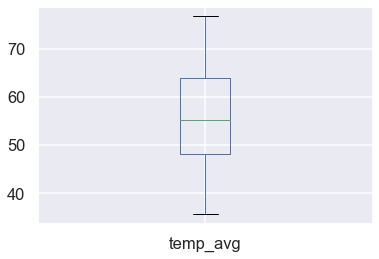

In [91]:
df.boxplot(column = ['temp_avg'])
f1 = plt.gcf()

There is no outlier or extreme outlier in the dataset. The maximum temperature is about 76.73 and the minimum temperature is about 35.58. It statisfies our normal cognition about the distribution of temperature in U.S.

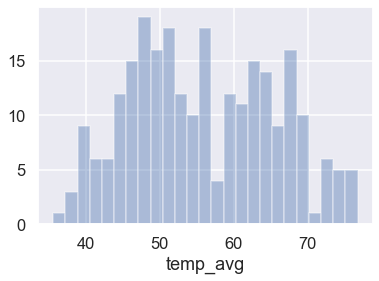

In [92]:
sns.distplot(df['temp_avg'],kde = False, bins = 25)
f3 = plt.gcf()

There distribution of temperature is not normal distribution. This makes sense because the cities in U.S are almost uniform distributed

2. The column "pcp_avg", which is precipitation average

In [93]:
df['pcp_avg'].describe()

count    253.000000
mean       3.113606
std        1.305792
min        0.235270
25%        1.907344
50%        3.303568
75%        4.095851
max        6.287635
Name: pcp_avg, dtype: float64

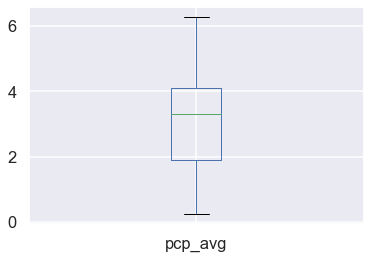

In [94]:
df.boxplot(column = ['pcp_avg'])
f2 = plt.gcf()

There is no outlier or extreme outlier in the dataset. The maximum temperature is about 6.29 and the minimum temperature is about 0.24. It statisfies our normal cognition about the distribution of precipitation in U.S. That is, the cities on the coastline tend to have apparently high precipitation, and cities in the inland part of U.S tend to have relatively low precipitation.

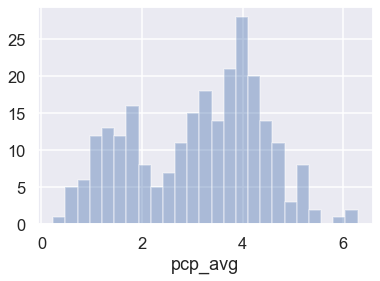

In [95]:
sns.distplot(df['pcp_avg'],kde = False, bins = 25)
f3 = plt.gcf()

The distribution of average of precipitation is reasonable. According to geography, the cities in the southwest of U.S have the lowest precipitation because of mediterranean climate, and the cities in the northwest of U.S have the highest precipitation because of temperate marine climate. Then because of American Cordillera, the vapour cannot go to the middle part of U.S. The precipitation of middle and east of U.S will decrease progressively from east to west. According to the geographic analysis, we find out that the distribution is consistent with our current knowledge.

In [96]:
df_strike_not0 = df[df['strike_avg'] != 0]
df_strike_not0['strike_avg'].describe()

count    142.000000
mean       7.492958
std       11.365994
min        0.083333
25%        0.666667
50%        2.666667
75%       10.395833
max       66.916667
Name: strike_avg, dtype: float64

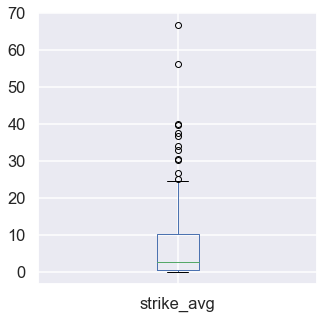

In [97]:
df_strike_not0.boxplot(column = ['strike_avg'],figsize = (5,5))
f4 = plt.gcf()

Since we observe that the skewness of the above boxplot is obvious, we add another boxplot of the Log10(...) values.

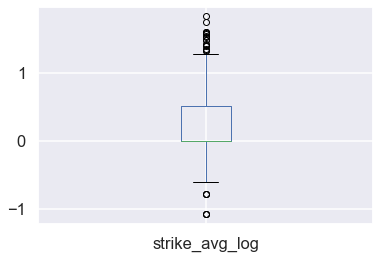

In [98]:
df['strike_avg_log'] = df['strike_avg'].apply(log_10)
df.boxplot(column = ['strike_avg_log'])
f4_log = plt.gcf()

## But this method does not help according to the following output boxplot.

5% of the data is outlier

Calculating the pairwise correlations among city_population, enplanement, length of runway, avg width of runway and avg security waiting

In [99]:
df[['city_population','enplanements','length_ft_sum','width_ft_avg','security_avg']].corr() 

,city_population,enplanements,length_ft_sum,width_ft_avg,security_avg
city_population,1.000000,0.615097,0.418047,0.173813,0.311009
enplanements,0.615097,1.000000,0.756220,0.302122,0.429995
length_ft_sum,0.418047,0.756220,1.000000,0.258532,0.302839
width_ft_avg,0.173813,0.302122,0.258532,1.000000,0.248840
security_avg,0.311009,0.429995,0.302839,0.248840,1.000000


enplanements is most correlated with city_population

length_ft_sum is most correlated with enplanements

enplanements is most correlated with with length_ft_sum

enplanements is most correlated with width_ft_avg

enplanements is most correlated with security_avg 

It seems that all of city population, length_ft_sum, width_ft_avg and security_avg are most relative with enplanement

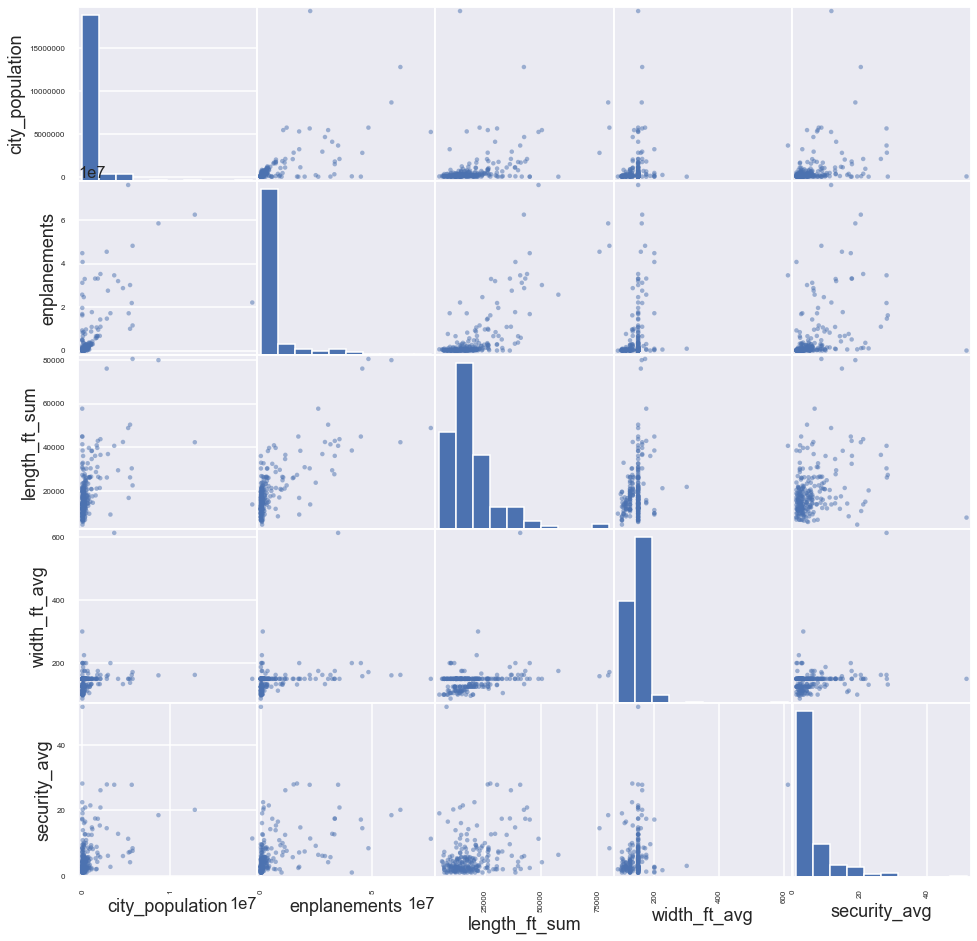

In [100]:
scatter_matrix = pd.plotting.scatter_matrix(df.loc[:,['city_population','enplanements','length_ft_sum','width_ft_avg','security_avg']],figsize = (16,16))
f5 = plt.gcf()

# enplanements

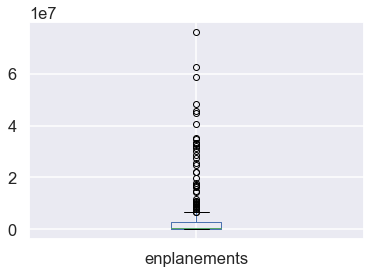

In [101]:
df_enplanements_not0 = df[df['enplanements'] != 0]
df_enplanements_not0.boxplot(column = ['enplanements'])
f6 = plt.gcf()

Since we observe that the skewness of the above boxplot is obvious, we add another boxplot of the Log10(...) values.

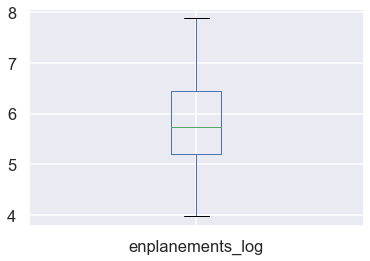

In [102]:
df['enplanements_log'] = df['enplanements'].apply(log_10)
df.boxplot(column = ['enplanements_log'])
f6_log = plt.gcf()

There are lots of outlier, so the data set is not appropriate. 
The distribution of enplanements data is extremely skewed to the left.
We have a look at the data which is larger than the 75% of the dataset.

In [103]:
df_enplanements_not0 = df_enplanements_not0['enplanements'].to_frame()
df_enplanements_not0.describe()

,enplanements
count,2.530000e+02
mean,4.930340e+06
std,1.119427e+07
min,9.460000e+03
25%,1.615725e+05
50%,5.456730e+05
75%,2.785062e+06
max,7.618486e+07


In [104]:
df_enplanements_75 = df_enplanements_not0[df_enplanements_not0['enplanements'] > 2.785062e+06] # 2.785062e+06 is the value of the 75% of dataset
df_enplanements_75.describe()

,enplanements
count,6.400000e+01
mean,1.786442e+07
std,1.651052e+07
min,2.785062e+06
25%,5.549120e+06
50%,1.079093e+07
75%,2.788376e+07
max,7.618486e+07


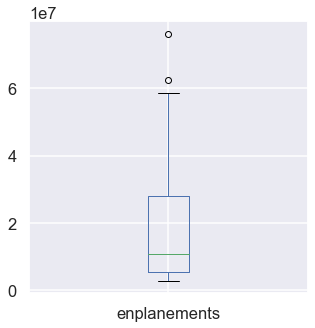

In [105]:
df_enplanements_75.boxplot(column = ['enplanements'],figsize = [5,5])
f7 = plt.gcf()

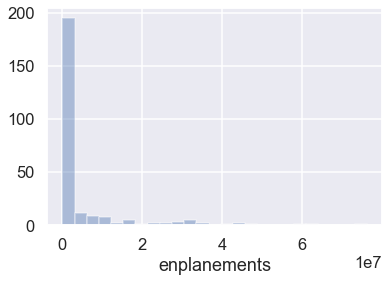

In [106]:
sns.distplot(df['enplanements'],kde = False, bins = 25)
f11 = plt.gcf()

The distribution is extremely skewed to the left. It makes sense because the amount of super large scale airports is very small in U.S. Most of the airports are in middle and small scale.

# city population

In [107]:
df['city_population'].describe()

count    2.530000e+02
mean     7.011998e+05
std      1.844147e+06
min      1.320000e+02
25%      5.061700e+04
50%      1.607420e+05
75%      4.678940e+05
max      1.935492e+07
Name: city_population, dtype: float64

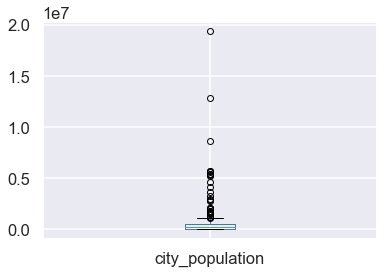

In [108]:
df.boxplot(column = ['city_population'])
f8 = plt.gcf()

Since we observe that the skewness of the above boxplot is obvious, we add another boxplot of the Log10(...) values.

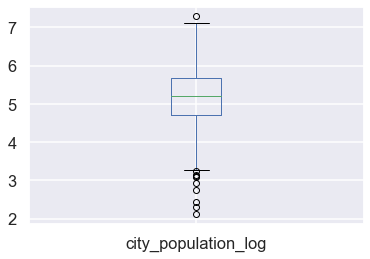

In [109]:
df['city_population_log'] = df['city_population'].apply(log_10)
df.boxplot(column = ['city_population_log'])
f8_log = plt.gcf()

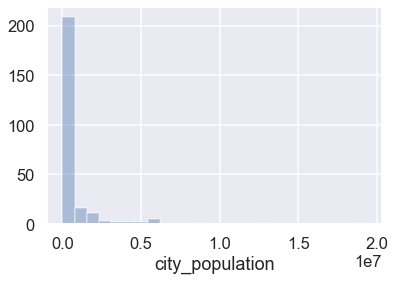

In [110]:
sns.distplot(df['city_population'],kde = False, bins = 25)
f12 = plt.gcf()

The distribution is extremely skewed to the left. It makes sense because the amount of super large scale cities like New York is very small in U.S. Most of the cities are in middle and small scale.

# Sum of length of runway in feet

In [111]:
df['length_ft_sum'].describe()

count      253.000000
mean     19481.430830
std      11379.818371
min       4801.000000
25%      12400.000000
50%      16353.000000
75%      22392.000000
max      80403.000000
Name: length_ft_sum, dtype: float64

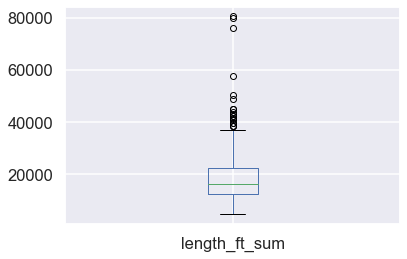

In [112]:
df.boxplot(column = ['length_ft_sum'])
f9 = plt.gcf()

Since we observe that the skewness of the above boxplot is obvious, we add a another boxplot of the Log10(...) values.

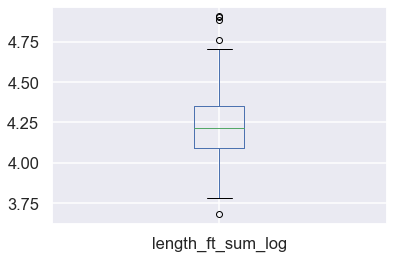

In [113]:
df['length_ft_sum_log'] = df['length_ft_sum'].apply(log_10)
df.boxplot(column = ['length_ft_sum_log'])
f9_log = plt.gcf()

# Average security waiting time

In [114]:
df['security_avg'].describe()

count    249.000000
mean       5.751651
std        6.289760
min        1.000000
25%        2.000000
50%        3.333333
75%        6.419355
max       51.687500
Name: security_avg, dtype: float64

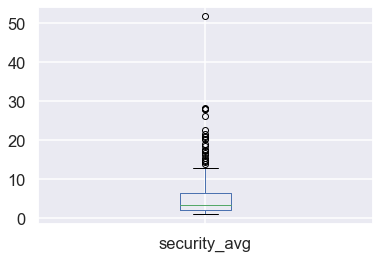

In [115]:
df.boxplot(column = ['security_avg'])
f10 = plt.gcf()

Since we observe that the skewness of the above boxplot is obvious, we add another boxplot of the Log10(...) values.

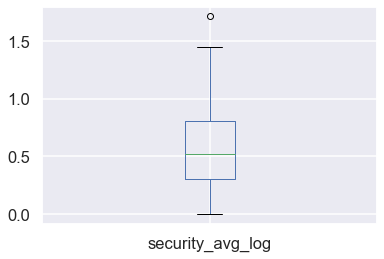

In [116]:
df['security_avg_log'] = df['security_avg'].apply(log_10)
df.boxplot(column = ['security_avg_log'])
f10_log = plt.gcf()

From the pairwise correlation form, we find that 'enplanements', 'city_population', 'length_feet_sum', 'width_feet_avg' and 'security_avg'
have very closed correlation. Hence the number of cities always decreases with the increasing of the scale of city, 
it makes sense that the distribution of 'city_population' extremely skew to the left. And this is why 
the distribution of 'enplanements' and 'length_feet_sum' are quite similar with the distribution of 'city_population'.

# Analysis about the relationship between the independent varaibles and the flight delay dataset

In [135]:
df_delay = pd.read_csv("delay_2018.csv")

In [136]:
df_delay = df_delay.rename(columns = {"airport_code":"Code"})

In [137]:
df = df.merge(df_delay, how = "left")

We choose to analyze the delay data by the average of departure delay and arrival delay.

In [138]:
df['average_delay'] = (df['average_departure_delay']+df['average_arrival_delay'])/2

Then we analyze the relationship between each independent variable and the average delay time.

In [139]:
(outcome_1,predictors_1) = patsy.dmatrices('average_delay ~ latitude',df)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

In [140]:
# Print out the summary results of the model fitting
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.667
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.104
Time:                        00:32:23   Log-Likelihood:                -676.36
No. Observations:                 250   AIC:                             1357.
Df Residuals:                     248   BIC:                             1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0222      1.586      6.318      0.0

The p-value of latitude over average delay is 0.104

Conclusion: Latitude cannot significantly predict average_delay

In [141]:
(outcome_2,predictors_2) = patsy.dmatrices('average_delay ~ longitude',df)
mod_2 = sm.OLS(outcome_2,predictors_2)
res_2 = mod_2.fit()

In [142]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           3.38e-09
Time:                        00:32:24   Log-Likelihood:                -660.04
No. Observations:                 250   AIC:                             1324.
Df Residuals:                     248   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8646      1.387     11.435      0.0

The p-value of longitude over average delay is 0.000

Conclusion: Longitude can significantly predict average_delay

In [143]:
(outcome_3,predictors_3) = patsy.dmatrices('average_delay ~ altitude_ft',df)
mod_3 = sm.OLS(outcome_3,predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     16.05
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           8.16e-05
Time:                        00:32:24   Log-Likelihood:                -669.85
No. Observations:                 250   AIC:                             1344.
Df Residuals:                     248   BIC:                             1351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.1140      0.277     29.265      

The p-value of Altitude over average delay is 0.000

Conclusion: Altitude_ft can significantly predict average_delay

In [144]:
(outcome_4,predictors_4) = patsy.dmatrices('average_delay ~ temp_avg',df)
mod_4 = sm.OLS(outcome_4,predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.676
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.197
Time:                        00:32:25   Log-Likelihood:                -676.85
No. Observations:                 250   AIC:                             1358.
Df Residuals:                     248   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7285      1.357      4.222      0.0

The p-value of average temperature over average delay is 0.197

Conclusion: Average temperature cannot significantly predict average_delay

In [145]:
(outcome_5,predictors_5) = patsy.dmatrices('average_delay ~ pcp_avg',df)
mod_5 = sm.OLS(outcome_5,predictors_5)
res_5 = mod_5.fit()
print(res_5.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     33.82
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           1.86e-08
Time:                        00:32:26   Log-Likelihood:                -661.72
No. Observations:                 250   AIC:                             1327.
Df Residuals:                     248   BIC:                             1334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3852      0.571      7.675      0.0

The p-value of average precipitation over average delay is 0.000

Conclusion: Average precipitation can significantly predict average_delay

In [146]:
(outcome_6,predictors_6) = patsy.dmatrices('average_delay ~ strike_avg',df)
mod_6 = sm.OLS(outcome_6,predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.004535
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.946
Time:                        00:32:27   Log-Likelihood:                -677.69
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4522      0.254     29.328      0.0

The p-value of average bird strike over average delay is 0.946

Conclusion: Average bird strike cannot significantly predict average_delay

In [147]:
(outcome_7,predictors_7) = patsy.dmatrices('average_delay ~ damage_avg',df)
mod_7 = sm.OLS(outcome_7,predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.005720
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.940
Time:                        00:32:28   Log-Likelihood:                -677.69
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4665      0.250     29.885      0.0

The p-value of average damage caused by bird strike over average delay is 0.940

Conclusion: Average damage caused by bird strike cannot significantly predict average_delay

In [148]:
(outcome_8,predictors_8) = patsy.dmatrices('average_delay ~ city_population',df)
mod_8 = sm.OLS(outcome_8,predictors_8)
res_8 = mod_8.fit()
print(res_8.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3766
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.540
Time:                        00:32:28   Log-Likelihood:                -677.50
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.4049      0.247     

The p-value of city population over average delay is 0.540

Conclusion: City population cannot significantly predict average_delay

In [149]:
(outcome_9,predictors_9) = patsy.dmatrices('average_delay ~ enplanements',df)
mod_9 = sm.OLS(outcome_9,predictors_9)
res_9 = mod_9.fit()
print(res_9.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1577
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.692
Time:                        00:32:29   Log-Likelihood:                -677.61
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4185      0.253     29.343   

The p-value of enplanements over average delay is 0.692

Conclusion: Enplanements cannot significantly predict average_delay

In [150]:
(outcome_10,predictors_10) = patsy.dmatrices('average_delay ~ length_ft_sum',df)
mod_10 = sm.OLS(outcome_10,predictors_10)
res_10 = mod_10.fit()
print(res_10.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6396
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.425
Time:                        00:32:29   Log-Likelihood:                -677.37
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7767      0.459     16.938

The p-value of sum of length of runways over average delay is 0.425

Conclusion: Sum of length of runways cannot significantly predict average_delay

In [151]:
(outcome_11,predictors_11) = patsy.dmatrices('average_delay ~ width_ft_avg',df)
mod_11 = sm.OLS(outcome_11,predictors_11)
res_11 = mod_11.fit()
print(res_11.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5187
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.472
Time:                        00:32:30   Log-Likelihood:                -677.43
No. Observations:                 250   AIC:                             1359.
Df Residuals:                     248   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.8237      0.912      7.480   

The p-value of average of width of runways over average delay is 0.472

Conclusion: Average of width of runways cannot significantly predict average_delay

In [152]:
(outcome_12,predictors_12) = patsy.dmatrices('average_delay ~ security_avg',df)
mod_12 = sm.OLS(outcome_12,predictors_12)
res_12 = mod_12.fit()
print(res_12.summary())

                            OLS Regression Results                            
Dep. Variable:          average_delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.03811
Date:                Sat, 14 Mar 2020   Prob (F-statistic):              0.845
Time:                        00:32:30   Log-Likelihood:                -660.71
No. Observations:                 246   AIC:                             1325.
Df Residuals:                     244   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.4590      0.309     24.155   

The p-value of average of security waiting time over average delay is 0.845

Conclusion: Average of security waiting time cannot significantly predict average_delay